**Task**

Use the archive [iris.csv](data/iris.csv).

Still using the first two features but choosing numbers from 1 to 15 for the value of parameter k. It's okay to start from a complete copy of the previous file. Running the program should display a graph showing the dependence of the accuracy metric on the test set in relation to the value of parameter k. Which k is the best choice? Discuss in the comments below the code.

In [ ]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

In [ ]:
# Data preprocessing
file_path = 'iris.csv'
data = pd.read_csv(file_path, usecols=['sepal_length', 'sepal_width', 'species'])

X = data.drop('species', axis=1)        # features
y = data['species']                     # target

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Equal number of all 3 types in both data sets (stratify = y)
train_X, test_X, train_y, test_y = train_test_split(X, y_encoded, test_size=0.08, random_state=42, stratify=y_encoded)

print(train_X.head())
print("-------------------------------")

# We are checking if the targets are equally distributedd
unique, counts = np.unique(train_y, return_counts=True)
print('Train species: \n', dict(zip(unique, counts)))
unique, counts = np.unique(test_y, return_counts=True)
print('Test species: \n', dict(zip(unique, counts)))

     sepal_length  sepal_width
1             4.9          3.0
120           6.9          3.2
9             4.9          3.1
52            6.9          3.1
118           7.7          2.6
-------------------------------
Train species: 
 {0: 46, 1: 46, 2: 46}
Test species: 
 {0: 4, 1: 4, 2: 4}


Preciznost za k = 1: 0.67
Preciznost za k = 2: 0.50
Preciznost za k = 3: 0.67
Preciznost za k = 4: 0.83
Preciznost za k = 5: 0.75
Preciznost za k = 6: 0.83
Preciznost za k = 7: 0.75
Preciznost za k = 8: 0.67
Preciznost za k = 9: 0.75
Preciznost za k = 10: 0.75
Preciznost za k = 11: 0.67
Preciznost za k = 12: 0.75
Preciznost za k = 13: 0.67
Preciznost za k = 14: 0.67
Preciznost za k = 15: 0.67


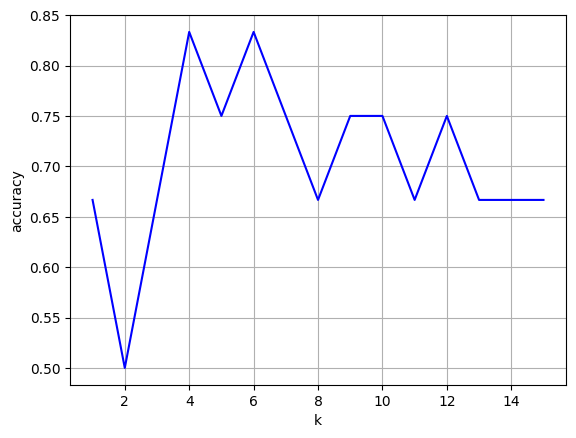

In [ ]:
class KNN:
    def __init__(self, nb_features, nb_classes, data, k, weighted=False):
        self.nb_features = nb_features
        self.nb_classes = nb_classes
        self.k = k
        self.weighted = weighted
        self.X = tf.convert_to_tensor(data['x'], dtype=tf.float32)
        self.Y = tf.convert_to_tensor(data['y'], dtype=tf.int32)

    def predict(self, query_data):
        nb_queries = query_data['x'].shape[0]
        matches = 0

        for i in range(nb_queries):
            # pandas DataFrame -> tensor
            query_point = tf.convert_to_tensor(query_data['x'].iloc[i].values, dtype=tf.float32)

            # Euclidean distance from the training point to all other points
            dists = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(self.X, query_point)), axis=1))
            _, idxs = tf.nn.top_k(-dists, self.k)

            classes = tf.gather(self.Y, idxs)
            dists = tf.gather(dists, idxs)

            if self.weighted:
                w = 1 / (dists + 1e-6)                  # + small number to avoid division by zero
            else:
                w = tf.fill([k], 1.0 / self.k)

            w_col = tf.reshape(w, (k, 1))
            classes_one_hot = tf.one_hot(classes, self.nb_classes)
            scores = tf.reduce_sum(w_col * classes_one_hot, axis=0)
            hyp = tf.argmax(scores)

            if query_data.get('y') is not None:
                actual = query_data['y'][i]
                match = (hyp == actual)
                if match:
                    matches += 1

        accuracy = matches / nb_queries if nb_queries > 0 else 0
        print(f'Preciznost za k = {k}: {accuracy:.2f}')
        return accuracy


nb_features = 2           # sepal_length and sepal_width
nb_classes = 3            # 3 targets
k = 3
train_data = {'x': train_X, 'y': train_y}
test_data = {'x': test_X, 'y': test_y}

accuracies = []
for k in range(1, 16):
  knn = KNN(nb_features, nb_classes, train_data, k)
  accuracy = knn.predict(test_data)
  accuracies.append(accuracy)

plt.plot(range(1, 16), accuracies, linestyle='-', c='blue')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

**Conclusion**

Changes in model performance are evident depending on the number of clusters, with accuracy increasing with the number of clusters, especially between k=1 and k=6. Maximum accuracy is achieved at k=4 and k=6. When the number of clusters is greater than 6, model accuracy decreases below the optimal level, hence there is no need for further increasing the number of clusters.